In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

/Users/Goleo8/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Loading Data

In [83]:
train_df = pd.read_csv('../../datasets/HouseP/train.csv',index_col='Id')
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature Engineering

In [84]:
from feature_selector import FeatureSelector

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [87]:
target = train_df['SalePrice']
train_df = train_df.drop('SalePrice',axis=1)

In [88]:
featureSelector=FeatureSelector(train_df,target)

## Using FeatureSelector

* removing features with too much missing value

In [89]:
featureSelector.identify_missing(missing_threshold=0.5)

4 features with greater than 0.50 missing values.



In [90]:
features_removed_missing=featureSelector.missing_stats[featureSelector.missing_stats['missing_fraction']>.4]
print(features_removed_missing)
features_removed_missing_names = features_removed_missing.index.tolist()

             missing_fraction
PoolQC               0.995205
MiscFeature          0.963014
Alley                0.937671
Fence                0.807534
FireplaceQu          0.472603


* compute the correlation between features

In [91]:
featureSelector.identify_collinear(correlation_threshold=0.6)

9 features with a correlation magnitude greater than 0.60.



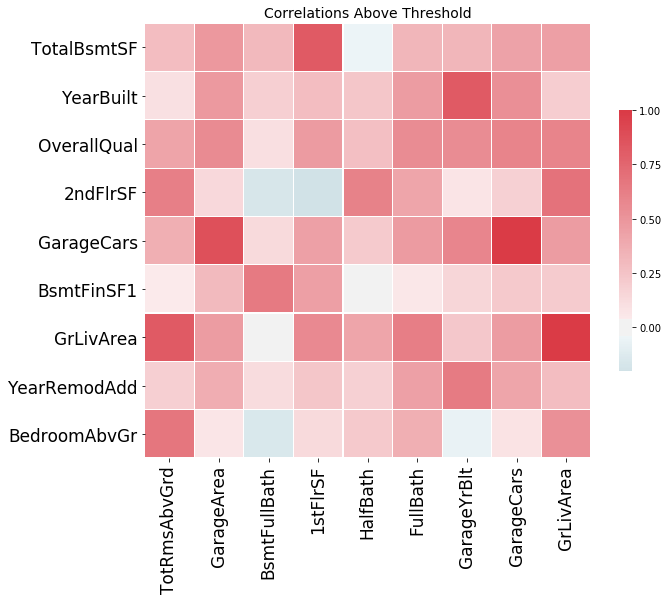

In [93]:
featureSelector.plot_collinear()

In [94]:
featureSelector.identify_zero_importance('regression',early_stopping=False)

Training Gradient Boosting Model


105 features with zero importance after one-hot encoding.



In [95]:
final_df=featureSelector.remove('all')

['missing', 'collinear', 'zero_importance'] methods have been run

Removed 118 features.


In [40]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

train_df = pd.read_csv('../../datasets/HouseP/train.csv',index_col='Id')

test_df = pd.read_csv('../../datasets/HouseP/test.csv',index_col='Id')


target = train_df['SalePrice']  #target variable

train_df = train_df.drop('SalePrice', axis=1)

train_df['training_set'] = True

test_df['training_set'] = False

df = pd.concat([train_df, test_df])

df = df.drop(features_removed_missing_names,axis=1)

df = df.drop(features_removed_corr,axis=1)

df= df.interpolate()

df = pd.get_dummies(df)

train_df = df[df['training_set']==True]

train_df = train_df.drop('training_set', axis=1)

test_df = df[df['training_set']==False]

test_df = test_df.drop('training_set', axis=1)


gbR=GradientBoostingRegressor(n_estimators=200)

gbR.fit(train_df, target)

preds = gbR.predict(test_df)

my_submission = pd.DataFrame({'Id': test_df.index, 'SalePrice': preds})

my_submission.to_csv('../../datasets/HouseP/output/submission.csv', index=False)

In [96]:
from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(train_df,target)
X_train, X_test, y_train, y_test = train_test_split(final_df,target)

In [99]:
final_df.head()

,MSZoning_FV,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,0,0,...,0,61,0,0,0,0,2,2008,WD,Normal
2,0,1,0,0,0,0,0,1,0,0,...,298,0,0,0,0,0,5,2007,WD,Normal
3,0,1,0,0,0,1,0,0,0,0,...,0,42,0,0,0,0,9,2008,WD,Normal
4,0,1,0,0,0,1,0,0,0,0,...,0,35,272,0,0,0,2,2006,WD,Abnorml
5,0,1,0,0,0,1,0,0,0,0,...,192,84,0,0,0,0,12,2008,WD,Normal


In [97]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
# gbR=GradientBoostingRegressor(n_estimators=200)

In [98]:
rf.fit(X_train,y_train)

ValueError: could not convert string to float: 'Normal'

In [50]:
y_train_predict=rf.predict(X_train)

In [54]:
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_train,y_train_predict)

128135569.78821586

In [63]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [62]:
cross_val_score(rf,X_train,y_train,cv=5,scoring='neg_mean_squared_error')

array([-9.56431161e+08, -1.32066847e+09, -1.11370933e+09, -6.98520428e+08,
       -7.69004460e+08])

In [65]:
y_train_predict=cross_val_predict(rf,X_train,y_train,cv=5)

In [66]:
mean_squared_error(y_train,y_train_predict)

960961627.8951902

In [68]:
y_train_predict.shape

(1095,)

In [69]:
y_train.shape

(1095,)